In [104]:
import os
import sys
sys.path.insert(0,'./tools/')

import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

In [105]:
# Get properties and functions specific to S-MODE maps
from tools.config import MAPEXTENT
from maps import *

In [106]:
# Het ops area polygon and shore line from S-MODE Github
map_url = 'https://raw.githubusercontent.com/NASA-SMODE/Maps/main/tools/' 
shore = pd.read_json(map_url + 'NorthCalShoreLine.json')
opsarea = pd.read_json(map_url + 'ops_area_polygon.json')

In [107]:
# Figure settings
figdir  = 'img/'
figname = 'SSTSnapshot'
extension = ['png']
figproperties = dict(dpi=200,bbox_inches='tight')

### Fetching some data from WHOI's S-MODE thredds

In [108]:
# The 10/14 VIIRS SST image looks particularly good
base_url = 'http://smode.whoi.edu:8080/thredds/dodsC/satellite/'
filename = 'VIIRS_NRT/VIIRS_NRT_20211014T102000Z.nc'

# Put the data into a Dataset and select data within MAPEXTENT
sst = xr.open_dataset(base_url+filename).isel(time=0)
sst = sst.where((sst.lon>=MAPEXTENT[0])&
                (sst.lon<=MAPEXTENT[1])&
                (sst.lat>=MAPEXTENT[2])&
                (sst.lat<=MAPEXTENT[3]),
                 drop=True)

In [109]:
sst

<xarray.Dataset>
Dimensions:                  (ni: 557, nj: 585)
Coordinates:
    time                     object 2021-10-14 10:20:00
    lat                      (nj, ni) float32 39.94 39.94 39.94 ... 35.05 35.05
    lon                      (nj, ni) float32 -125.6 -125.6 ... -121.4 -121.4
Dimensions without coordinates: ni, nj
Data variables:
    sea_surface_temperature  (nj, ni) float32 nan nan nan nan ... nan nan nan
    quality_level            (nj, ni) float32 nan nan nan nan ... nan nan nan
Attributes:
    geospatial_bounds:                        POLYGON((-146.964  34.537, -149...
    geospatial_first_scanline_first_fov_lat:  68.88073
    geospatial_first_scanline_first_fov_lon:  -149.86667
    geospatial_first_scanline_last_fov_lat:   59.309746
    geospatial_first_scanline_last_fov_lon:   -86.458244
    geospatial_last_scanline_first_fov_lat:   34.53677
    geospatial_last_scanline_first_fov_lon:   -146.96358
    geospatial_last_scanline_last_fov_lat:    29.591717
    geospatial_last_scanline_last_fov_lon:    -114.82252
    Conventions:                              CF-1.6, ACDD-1.3
    Metadata_Conventions:                     Unidata Dataset Discovery v1.0
    acknowledgement:                          Please acknowledge the use of t...
    cdm_data_type:                            swath
    comment:                                  none
    creator_email:                            Alex.Ignatov@noaa.gov
    creator_name:                             Alex Ignatov
    creator_url:                              http://www.star.nesdis.noaa.gov
    date_created:                             20211014T124221Z
    destripe:                                 yes (M5:1.0:f M7:1.0:f M10:1.0:...
    easternmost_longitude:                    -86.458244
    file_quality_level:                       3
    gds_version_id:                           02.0
    geospatial_lat_resolution:                0.0067
    geospatial_lat_units:                     degrees_north
    geospatial_lon_resolution:                0.0067
    geospatial_lon_units:                     degrees_east
    history:                                  Created by Advanced Clear-Sky P...
    id:                                       VIIRS_NPP-OSPO-L2P-v2.61
    institution:                              NOAA/NESDIS/OSPO
    keywords:                                 Oceans > Ocean Temperature > Se...
    keywords_vocabulary:                      NASA Global Change Master Direc...
    license:                                  GHRSST protocol describes data ...
    metadata_link:                            http://podaac.jpl.nasa.gov/ws/m...
    naming_authority:                         org.ghrsst
    northernmost_latitude:                    69.36701
    platform:                                 NPP
    processing_level:                         L2P
    product_version:                          2.61
    project:                                  Group for High Resolution Sea S...
    publisher_email:                          ghrsst-po@nceo.ac.uk
    publisher_name:                           The GHRSST Project Office
    publisher_url:                            http://www.ghrsst.org
    references:                               Data convention: GHRSST Data Sp...
    sensor:                                   VIIRS
    aggregator_version:                       V1.00
    preprocessor_version:                     1.14
    sst_luts:                                 LUT_VIIRS_NPP_L2P_DEPTH_DAY_V01...
    source:                                   VIIRS-MOD-GEO-TC,VIIRS-M5-SDR,V...
    southernmost_latitude:                    29.591717
    spatial_resolution:                       742 m at nadir
    standard_name_vocabulary:                 CF Standard Name Table (v26, 08...
    start_time:                               20211014T102000Z
    stop_time:                                20211014T103000Z
    summary:                                  Sea surface temperature retriev...
    tim

In [110]:
# AVISO's SLA may also be useful
base_url = 'http://smode.whoi.edu:8080/thredds/dodsC/satellite/'
aviso = xr.open_dataset(base_url+'AVISO/aviso.nc').sel(time='2021-10-14T00:00:00.000000000')

# AVISO data is on a regular grid, with longitude and latitude as coordinates, 
# so we can slice the dataset easily
d = 0.25
aviso = aviso.sel(longitude=slice(MAPEXTENT[0]-d,MAPEXTENT[1]+d),
                  latitude=slice(MAPEXTENT[2]-d,MAPEXTENT[3]+d)
)

In [111]:
aviso

<xarray.Dataset>
Dimensions:    (latitude: 14, longitude: 22)
Coordinates:
    time       datetime64[ns] 2021-10-14
  * latitude   (latitude) float32 35.88 36.12 36.38 36.62 ... 38.62 38.88 39.12
  * longitude  (longitude) float32 -126.1 -125.9 -125.6 ... -121.4 -121.1 -120.9
Data variables:
    adt        (latitude, longitude) float64 ...
    ugos       (latitude, longitude) float64 ...
    vgos       (latitude, longitude) float64 ...
    vgosa      (latitude, longitude) float64 ...
    err        (latitude, longitude) float64 ...
    err_vgosa  (latitude, longitude) float64 ...
    err_ugosa  (latitude, longitude) float64 ...
    sla        (latitude, longitude) float64 ...
    ugosa      (latitude, longitude) float64 ...
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2021-10-15T23:50:24Z
    date_issued:                     2021-10-15T23:50:24Z
    date_modified:                   2021-10-15T23:50:24Z
    geospatial_lat_max:              39.125
    geospatial_lat_min:              34.125
    geospatial_lat_resolution:       0.25
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              -120.125
    geospatial_lon_min:              -129.875
    geospatial_lon_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2021-10-15 23:50:25Z: Creation
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        Altika, Cryosat-2 New Orbit, Haiyang-2B,...
    processing_level:                L4
    product_version:                 vMay2021
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    software_version:                18.7.3_DUACS_DT2018_baseline
    source:                          Altimetry measurements
    ssalto_duacs_comment:            Jason-3 is the reference mission used fo...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Near-Real-Time Level-4 sea ...
    time_coverage_duration:          P1D
    time_coverage_end:               2021-10-16T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2021-10-15T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...
    History:                         Translated to CF-1.0 Conventions by Netc...

# A quick-and-dirty plot

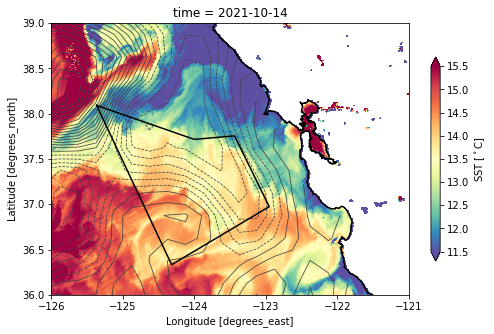

In [112]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

# Plot shoreline and operations area
shore.plot(x = 'longitude',
           y = 'latitude', 
           color = 'k',
           legend=False,
           ax = ax
)

opsarea.plot(x = 'longitude',
             y = 'latitude', 
             color = 'k',
             legend=False,
             ax = ax
)

# plot SST image
kwargs_t = {
    'vmin': 11.5,
    'vmax': 15.5,
    'cmap': 'Spectral_r',
    'add_colorbar': False
}

im = (sst.sea_surface_temperature-273.15).\
                plot.pcolormesh(x='lon',
                                y='lat',
                                **kwargs_t
                )

# contour absolute dynamic topography
kwargs_a = {
    'levels': np.arange(-0.2,0.201,.01),
    'colors': '0.25',
    'linewidths': 0.75
}

(aviso.adt-aviso.adt.mean()).plot.contour(**kwargs_a,ax=ax)

ax.set_xlim(*MAPEXTENT[:2])
ax.set_ylim(*MAPEXTENT[2:])

plt.colorbar(im,label=r'SST [$^\circ$C]',
             shrink=0.75,extend='both')

## A map with projection using cartopy

In [113]:
projection = ccrs.PlateCarree(
                central_longitude=(MAPEXTENT[0]+MAPEXTENT[1])/2
)

map_axes = (GeoAxes,{'map_projection':projection})
trans = ccrs.PlateCarree()

[None]

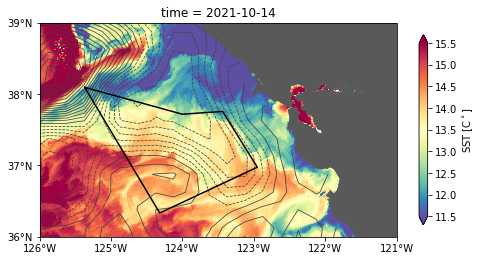

In [114]:
fig = plt.figure(figsize=(8,7))

ax = fig.add_subplot(111, projection=projection)     

ax.set_extent(MAPEXTENT)


# Plot shoreline and operations area
opsarea.plot(x = 'longitude',
             y = 'latitude', 
             color = 'k',
             legend=False,
             ax = ax,
             transform=ccrs.PlateCarree()
)

# plot sst image
im = (sst.sea_surface_temperature-273.15).\
                plot.pcolormesh(x='lon',
                                y='lat',
                                transform=trans,
                                **kwargs_t)

# contour absolute dynamic topography
(aviso.adt-aviso.adt.mean()).plot.contour(ax=ax, 
                                          transform=trans,
                                           **kwargs_a)


# map properties (continent, labels, grid)
plot_map_properties(ax,
                    transform=ccrs.PlateCarree(),
                    continent_facecolor='0.35')

fig.colorbar(im,shrink=0.5,extend='both',
             label=r'SST [C$^\circ$]')

# Save figure in the desired extensions
[fig.savefig(os.path.join(figdir,figname+'_cartopy.'+ext),
             **figproperties) 
             for ext in extension]